# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from utilities import plot_classification

def sigmoid(x):
    return 1/(1+np.exp(-x))

Likelihood Function

To derive the loss function, we first need to use the maximum likelihood estimation (MLE)

We want to maximize the likelihood of correctly predicting the output y

$$
P(y_i = 1 | x_i; w) = sigmoid(w^T x_i) = y\_pred \\
P(y_i = 0 | x_i; w) = 1 - sigmoid(w^T x_i) = 1 - y\_pred
$$

Combining the likelihood of both binary cases:

$$
\begin{align}
\text{Likelihood} &= \prod_{i}^{N} \left(sigmoid(w^T x_i)^y \cdot (1 - sigmoid(w^T x_i))^{(1-y)} \right) \\
&= \prod_{i}^{N} \left(y\_pred^y \cdot (1 - y\_pred)^{(1-y)}\right)
\end{align}
$$

In [2]:
def likelihood(X, w, y):
    y_pred = sigmoid(np.dot(X, w))
    return y_pred ** y * (1 - y_pred) ** (1 - y)
    

To simplify the calculations, we will take the log of the likelihood function

$$
\text{Likelihood} = \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

and the loss function is just the negative of that

$$
\text{Loss} = - \text{Likelihood} = - \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

In [3]:
def loss(X, w, y):
    return -np.log(likelihood(X, w, y))

Now to optimize the loss function, we need to derive the gradient of the loss function

$$
\begin{align*}
\frac{\partial \text{Loss}}{\partial w} = \frac{\partial}{\partial w} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right) \\ 
\because \frac{\partial y\_pred}{\partial x} = \frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1 - \sigma(x)) \\
\therefore -y \frac{y\_pred (1 - y\_pred)}{y\_pred} \; x + (1 - y) \frac{y\_pred (1 - y\_pred)}{1-y\_pred} \; x \tag*{(Applying chain rule)} \\
-y (1 - y\_pred) \cdot x + (1 - y) y\_pred \cdot x \tag*{(Simplification)} \\
(y - y\_pred) \cdot x \tag*{(Simplifying further)} \\
\end{align*}
$$

In [4]:
def loss_gradient(X, w, y):
    """Compute the gradient of the neg-log-loss

    Args:
        X (n_samples, n_features)
        w (n_features)
        y (n_samples)

    Returns: gradient of the loss function (n_features)
    """
    y_pred = sigmoid(np.dot(X, w))
    return np.dot(X.T, (y_pred - y))

Putting all together

In [5]:
def logistic_regression(X, y, learning_rate=0.0001, max_iter=1000):
    print("Feature matrix X:\n", X[:2])
    print("Target labels y:\n", y[:2])
    
    # initialize the weights to zero, the weight dimension is the same as the number of features
    w = np.zeros(X.shape[1])
    y_pred = sigmoid(np.dot(X, w))

    # plot the relationship between the random predictions and labels
    plot_classification(y, y_pred, "before running logistic regression")
    
    for i in range(max_iter):
        if i % (max_iter // 10) == 0:
            print(f"Iteration {i}: {np.mean(loss(X, w, y))=}")

        # update weights
        w -= learning_rate * loss_gradient(X, w, y)
    return w

To Test the implementation

Feature matrix X:
 [[-0.64250259 -0.79567619  1.83553864  0.52492517 -0.10833794  0.04212518
  -0.4353703   0.36784819  2.17910198  0.48383491  1.41633307  1.08004482
   2.13882422 -0.02698868 -0.690378    1.12719039 -0.13503055 -0.03350264
  -0.64780805  3.64996334 -1.12080729 -1.57002254 -0.82629099 -5.10581952
   4.47802666 -0.29377665 -0.81972957 -0.24057856 -0.79146266  0.76631805]
 [-0.63618575 -0.66203529  1.50733416  0.89135443 -0.27540611 -0.4308139
   0.99275863  0.10688243 -0.38799493  1.31855868 -1.6357121   0.54633338
  -1.66099421 -0.65815562 -0.5799707   0.0634107   1.18154413 -1.094699
   0.13475901 -0.6875426  -1.24262045 -0.69341692  0.47216413  1.09358041
   0.23283612  0.61375808  1.64742808  2.37511782  1.45174116 -1.6342062 ]]
Target labels y:
 [1 1]


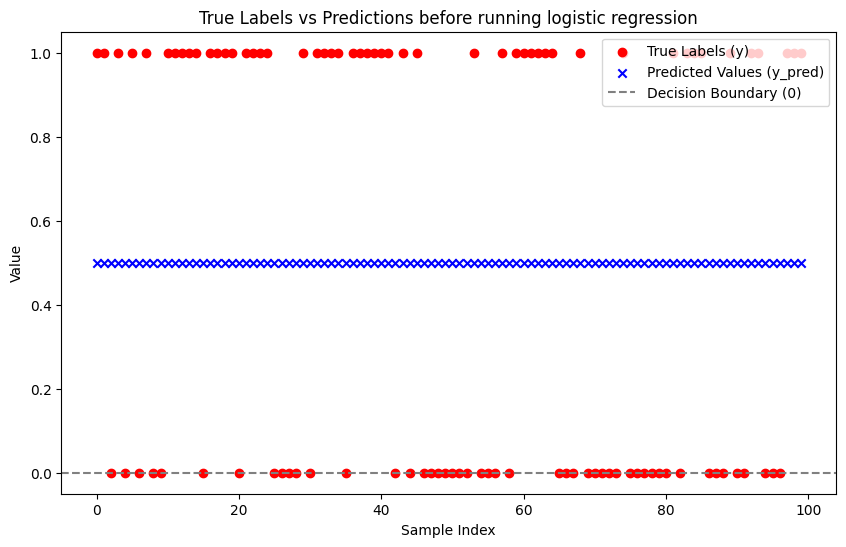

Iteration 0: np.mean(loss(X, w, y))=np.float64(0.6931471805599453)
Iteration 100: np.mean(loss(X, w, y))=np.float64(0.43278317967300167)
Iteration 200: np.mean(loss(X, w, y))=np.float64(0.3432377706842974)
Iteration 300: np.mean(loss(X, w, y))=np.float64(0.2945303293629257)
Iteration 400: np.mean(loss(X, w, y))=np.float64(0.2634520903828569)
Iteration 500: np.mean(loss(X, w, y))=np.float64(0.24171209676409752)
Iteration 600: np.mean(loss(X, w, y))=np.float64(0.22551776770236187)
Iteration 700: np.mean(loss(X, w, y))=np.float64(0.21288976441893026)
Iteration 800: np.mean(loss(X, w, y))=np.float64(0.20269631565770904)
Iteration 900: np.mean(loss(X, w, y))=np.float64(0.19424378988736246)


In [6]:
# Generate data
X, y = make_classification(n_samples=100, n_features=30)
learned_weights = logistic_regression(X, y, max_iter=1000)

Let's check the performance of the model, after running logistic regression

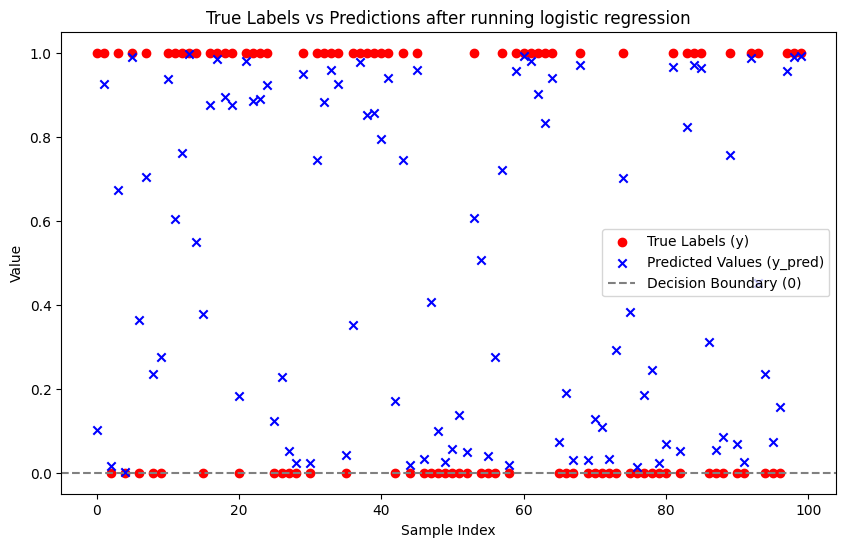

In [7]:
y_pred = sigmoid(np.dot(X, learned_weights))

plot_classification(y, y_pred, "after running logistic regression")